3ª Tarefa - Marcus Vinícius Oliveira Souza

# Introdução à Ciência de Dados - CK0268

### Projeto 3: Algoritmos de Machine Learning

##### 1. Descrição:
Este trabalho consiste na utilização de algoritmos de machine learning com
a finalidade de criar modelos (preditivos, descritivos ou híbridos) que
possibilitem extrair padrões ou conhecimento do dataset utilizado nos
trabalhos anteriores.

##### 2. Tipo de problema escolhido:
O problema que será usado no seguinte trabalho vai ser o de agrupamento também chamdo de Clustering. Irei utilizar K-means que é um método de aprendizado não supervisionado usado para agrupar dados. Onde irei agrupar os filmes do meu dataset em grupos com segmentos semelhantes.

##### 3. Métrica para avaliação de desempenho: 
- Índice Davies-Bouldin: é uma métrica comumente usada para avaliar a qualidade do clustering em algoritmos como o k-Means. Porque o Índice Davies-Bouldin pode ser utilizado para determinar o número ideal de clusters em um conjunto de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

In [4]:
#dataset
df = pd.read_csv('IMDB.csv')

In [5]:
df.head()

,ID,Titulo,Genero,Lançamento,Duração,Nota,MetaScore,Votos,Faturamento,Sinopse
0,0,Um Sonho de Liberdade,Drama,1994,142,9.3,82.0,2750243,28.34,"Over the course of several years, two convicts..."
1,1,O Poderoso Chefão,"Crime, Drama",1972,175,9.2,100.0,1912969,134.97,"Don Vito Corleone, head of a mafia family, dec..."
2,2,Homem-Aranha: Através do Aranhaverso,"Animation, Action, Adventure",2023,140,9.0,86.0,98913,#11,"Miles Morales catapults across the Multiverse,..."
3,3,Batman: O Cavaleiro das Trevas,"Action, Crime, Drama",2008,152,9.0,84.0,2723005,534.86,When the menace known as the Joker wreaks havo...
4,4,A Lista de Schindler,"Biography, Drama, History",1993,195,9.0,95.0,1386984,96.90,"In German-occupied Poland during World War II,..."


In [6]:
#Removendo colunas desnecesárias
df.drop(columns=["Lançamento", "Sinopse"], inplace=True)

In [7]:
#Transformando a coluna Faturamento e removendo valores não numéricos da coluna
df['Faturamento'] = pd.to_numeric(df['Faturamento'], errors='coerce')

df = df.dropna(subset=['Faturamento','MetaScore','Votos','Nota'])

In [8]:
# Separar os gêneros individuais
generos = ', '.join(df['Genero'].tolist())
generos_lista = [genero.strip() for genero in generos.split(',')]

generos = list(set(generos_lista))
print('Número de gêneros:', len(generos))

Número de gêneros: 19


In [9]:
#Criando variáveis dummyes
for genero in generos:
    df[genero] = df['Genero'].str.contains(genero).astype(int)

In [10]:
#Variável auxiliar informando qual o principal gênero do filme
df['Genero_P'] = df['Genero'].str.split(',').str.get(0)

In [11]:
df.head()

,ID,Titulo,Genero,Duração,Nota,MetaScore,Votos,Faturamento,Musical,Thriller,...,Romance,Action,Drama,Crime,Animation,Biography,War,Horror,Comedy,Genero_P
0,0,Um Sonho de Liberdade,Drama,142,9.3,82.0,2750243,28.34,0,0,...,0,0,1,0,0,0,0,0,0,Drama
1,1,O Poderoso Chefão,"Crime, Drama",175,9.2,100.0,1912969,134.97,0,0,...,0,0,1,1,0,0,0,0,0,Crime
3,3,Batman: O Cavaleiro das Trevas,"Action, Crime, Drama",152,9.0,84.0,2723005,534.86,0,0,...,0,1,1,1,0,0,0,0,0,Action
4,4,A Lista de Schindler,"Biography, Drama, History",195,9.0,95.0,1386984,96.90,0,0,...,0,0,1,0,0,1,0,0,0,Biography
5,5,O Poderoso Chefão II,"Crime, Drama",202,9.0,90.0,1302879,57.30,0,0,...,0,0,1,1,0,0,0,0,0,Crime


In [12]:
#Variáveis que entraram no modelo K-Means
features = ['Faturamento','Nota', 'MetaScore', 'Votos', 'Duração'] + generos

In [13]:
#NORMALIZANDO OS DADOS
df['Votos'] = (df['Votos'] - df['Votos'].min()) / (df['Votos'].max() - df['Votos'].min())
df['Duração'] = (df['Duração'] - df['Duração'].min()) / (df['Duração'].max() - df['Duração'].min())
df['Faturamento'] = (df['Faturamento'] - df['Faturamento'].min()) / (df['Faturamento'].max() - df['Faturamento'].min())
df['Nota'] = (df['Nota'] - df['Nota'].min()) / (df['Nota'].max() - df['Nota'].min())
df['MetaScore'] = (df['MetaScore'] - df['MetaScore'].min()) / (df['MetaScore'].max() - df['MetaScore'].min())

In [14]:
#Criando um data frame apenas com valores do tipo numérico e aquelas que entraram no modelo para determinar o número 'k' de clusters
cluster_df = df.drop(columns=['ID','Titulo', 'Genero', 'Genero_P','Duração','Faturamento'])

In [15]:
cluster_df.head()

,Nota,MetaScore,Votos,Musical,Thriller,Adventure,Sci-Fi,Western,Music,History,...,Fantasy,Romance,Action,Drama,Crime,Animation,Biography,War,Horror,Comedy
0,1.0,0.581395,1.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.9,1.000000,0.686211,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.7,0.627907,0.989792,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,0.7,0.883721,0.489086,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
5,0.7,0.767442,0.457565,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [16]:
#Função apresentada em sala para determinar o valor de 'k'
def get_kmeans_score(data, center):

    kmeans = KMeans(n_clusters=center, init='k-means++')
    model = kmeans.fit_predict(cluster_df)

    # Cálculo do Davies Bouldin score
    score = davies_bouldin_score(cluster_df, model)

    return score

C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

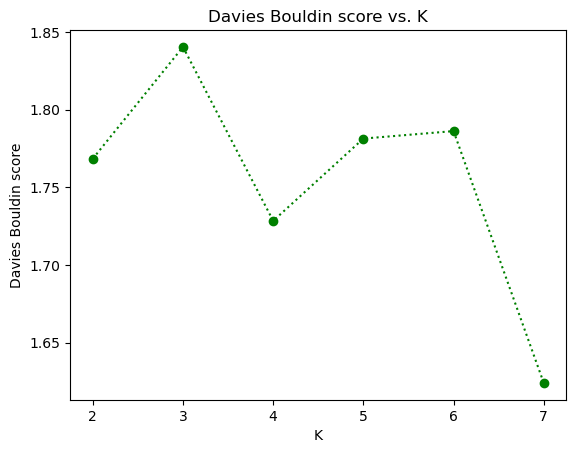

In [17]:
np.random.seed(100)
scores = []
centers = list(range(2,8))
for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))

plt.plot(centers, scores, linestyle=':', marker='o', color='g');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

Seleciona-se o 1º mínimo do gráfico, no caso, k=4.

In [18]:
model = KMeans(n_clusters=4, random_state=100)

model.fit(df[features])
# Adicionar as informações de cluster ao DataFrame original
df['cluster'] = model.predict(df[features])


C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


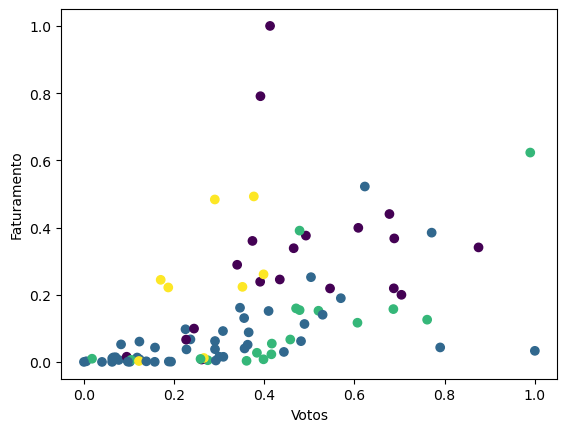

In [19]:
# Visualizaçãp dos clusters (exemplo: Votos x faturamento)
plt.scatter(df['Votos'], df['Faturamento'], c=df['cluster'])
plt.xlabel('Votos')
plt.ylabel('Faturamento')
plt.show()

In [21]:
df.head(50)

,ID,Titulo,Genero,Duração,Nota,MetaScore,Votos,Faturamento,Musical,Thriller,...,Action,Drama,Crime,Animation,Biography,War,Horror,Comedy,Genero_P,cluster
0,0,Um Sonho de Liberdade,Drama,0.412162,1.0,0.581395,1.000000,0.032994,0,0,...,0,1,0,0,0,0,0,0,Drama,1
1,1,O Poderoso Chefão,"Crime, Drama",0.635135,0.9,1.000000,0.686211,0.157220,0,0,...,0,1,1,0,0,0,0,0,Crime,2
3,3,Batman: O Cavaleiro das Trevas,"Action, Crime, Drama",0.479730,0.7,0.627907,0.989792,0.623102,0,0,...,1,1,1,0,0,0,0,0,Action,2
4,4,A Lista de Schindler,"Biography, Drama, History",0.770270,0.7,0.883721,0.489086,0.112868,0,0,...,0,1,0,0,1,0,0,0,Biography,1
5,5,O Poderoso Chefão II,"Crime, Drama",0.817568,0.7,0.767442,0.457565,0.066733,0,0,...,0,1,1,0,0,0,0,0,Crime,2
6,6,O Senhor dos Anéis: O Retorno do Rei,"Action, Adventure, Drama",0.810811,0.7,0.860465,0.677492,0.440182,0,0,...,1,1,0,0,0,0,0,0,Action,0
7,7,12 Homens e uma Sentença,"Crime, Drama",0.101351,0.7,0.930233,0.274514,0.005056,0,0,...,0,1,1,0,0,0,0,0,Crime,2
8,8,Pulp Fiction: Tempo de Violência,"Crime, Drama",0.493243,0.6,0.883721,0.761127,0.125718,0,0,...,0,1,1,0,0,0,0,0,Crime,2
9,9,A Origem,"Action, Adventure, Sci-Fi",0.452703,0.5,0.395349,0.875081,0.340840,0,0,...,1,0,0,0,0,0,0,0,Action,0
10,10,O Senhor dos Anéis: A Sociedade do Anel,"Action, Adventure, Drama",0.655405,0.5,0.813953,0.688205,0.367589,0,0,...,1,1,0,0,0,0,0,0,Action,0


In [22]:
cluster1 = df[(df['cluster'] == 0)].iloc[:, 1:8]
cluster2 = df[(df['cluster'] == 1)].iloc[:, 1:8]
cluster3 = df[(df['cluster'] == 2)].iloc[:, 1:8]
cluster4 = df[(df['cluster'] == 3)].iloc[:, 1:8]

In [23]:
print("Número de filmes do Cluster 1:", len(cluster1))
print("Número de filmes do Cluster 2:", len(cluster2))
print("Número de filmes do Cluster 3:", len(cluster3))
print("Número de filmes do Cluster 4:", len(cluster4))

Número de filmes do Cluster 1: 19
Número de filmes do Cluster 2: 45
Número de filmes do Cluster 3: 18
Número de filmes do Cluster 4: 8


In [24]:
cluster1

,Titulo,Genero,Duração,Nota,MetaScore,Votos,Faturamento
6,O Senhor dos Anéis: O Retorno do Rei,"Action, Adventure, Drama",0.810811,0.7,0.860465,0.677492,0.440182
9,A Origem,"Action, Adventure, Sci-Fi",0.452703,0.5,0.395349,0.875081,0.340840
10,O Senhor dos Anéis: A Sociedade do Anel,"Action, Adventure, Drama",0.655405,0.5,0.813953,0.688205,0.367589
13,Três Homens em Conflito,"Adventure, Western",0.540541,0.5,0.767442,0.260965,0.007083
14,O Senhor dos Anéis: As Duas Torres,"Action, Adventure, Drama",0.662162,0.5,0.697674,0.608479,0.399056
15,Interestelar,"Adventure, Drama, Sci-Fi",0.594595,0.4,0.395349,0.687178,0.219025
17,Matrix,"Action, Sci-Fi",0.371622,0.4,0.372093,0.704113,0.199755
19,Star Wars: Episódio V - O Império Contra-Ataca,"Action, Adventure, Fantasy",0.290541,0.4,0.581395,0.465133,0.338393
24,Star Wars: Episódio IV - Uma Nova Esperança,"Action, Adventure, Fantasy",0.270270,0.3,0.767442,0.492253,0.375977
25,O Exterminador do Futuro 2: O Julgamento Final,"Action, Sci-Fi",0.378378,0.3,0.418605,0.390780,0.238621


OBS: Nota-se que os filmes abrangem uma variedade de gêneros populares, como fantasia, ficção científica, ação, aventura e suspense. Com jornadas heróicas e/ou histórias épicas, tornando-se ícones da cultura pop.

In [25]:
cluster2

,Titulo,Genero,Duração,Nota,MetaScore,Votos,Faturamento
0,Um Sonho de Liberdade,Drama,0.412162,1.0,0.581395,1.000000,0.032994
4,A Lista de Schindler,"Biography, Drama, History",0.770270,0.7,0.883721,0.489086,0.112868
11,Clube da Luta,Drama,0.391892,0.5,0.209302,0.790038,0.043118
12,Forrest Gump: O Contador de Histórias,"Drama, Romance",0.412162,0.5,0.581395,0.771125,0.384727
18,Um Estranho no Ninho,Drama,0.351351,0.4,0.627907,0.355285,0.130460
21,O Resgate do Soldado Ryan,"Drama, War",0.594595,0.3,0.790698,0.503513,0.252251
28,A Vida é Bela,"Comedy, Drama, Romance",0.236486,0.3,0.046512,0.236131,0.067082
29,Os Sete Samurais,"Action, Drama",0.851351,0.3,0.953488,0.101665,0.000291
32,Parasita,"Drama, Thriller",0.344595,0.2,0.906977,0.290656,0.062154
34,Whiplash: Em Busca da Perfeição,"Drama, Music",0.168919,0.2,0.744186,0.309170,0.015227


OBS: Os filmes abordam temas profundos e impactantes, como liberdade, guerra, violência, injustiça, identidade. Explorando aspectos da condição humana através de temas dramáticos.

In [26]:
cluster3

,Titulo,Genero,Duração,Nota,MetaScore,Votos,Faturamento
1,O Poderoso Chefão,"Crime, Drama",0.635135,0.9,1.000000,0.686211,0.157220
3,Batman: O Cavaleiro das Trevas,"Action, Crime, Drama",0.479730,0.7,0.627907,0.989792,0.623102
5,O Poderoso Chefão II,"Crime, Drama",0.817568,0.7,0.767442,0.457565,0.066733
7,12 Homens e uma Sentença,"Crime, Drama",0.101351,0.7,0.930233,0.274514,0.005056
8,Pulp Fiction: Tempo de Violência,"Crime, Drama",0.493243,0.6,0.883721,0.761127,0.125718
16,Os Bons Companheiros,"Biography, Crime, Drama",0.432432,0.4,0.813953,0.416644,0.054547
20,À Espera de um Milagre,"Crime, Drama, Fantasy",0.729730,0.3,0.093023,0.470464,0.159352
22,Seven: Os Sete Crimes Capitais,"Crime, Drama, Mystery",0.310811,0.3,0.186047,0.606600,0.116631
23,O Silêncio dos Inocentes,"Crime, Drama, Thriller",0.250000,0.3,0.674419,0.520061,0.152292
27,Cidade de Deus,"Crime, Drama",0.331081,0.3,0.511628,0.258533,0.008784


OBS: A maioria dos filmes do cluster 3 pertence ao gênero de crime ou thriller, com elementos de suspense, ação e violência. Muitos são altamente aclamados pela crítica (alto MetaScore) e são considerados obras-primas do cinema.

In [27]:
cluster4.head(18)

,Titulo,Genero,Duração,Nota,MetaScore,Votos,Faturamento
26,A Viagem de Chihiro,"Animation, Adventure, Family",0.297297,0.3,0.906977,0.265939,0.011697
41,O Rei Leão,"Animation, Adventure, Drama",0.047297,0.2,0.720930,0.376720,0.492526
53,Homem-Aranha: No Aranhaverso,"Animation, Action, Adventure",0.243243,0.1,0.697674,0.187004,0.221611
67,Viva: A Vida é uma Festa,"Animation, Adventure, Comedy",0.162162,0.1,0.558140,0.170215,0.244318
68,WALL·E,"Animation, Adventure, Family",0.114865,0.1,0.883721,0.398345,0.260721
91,Toy Story,"Animation, Adventure, Comedy",0.000000,0.0,0.906977,0.351526,0.223429
93,Toy Story 3,"Animation, Adventure, Comedy",0.148649,0.0,0.813953,0.290231,0.483462
95,Princesa Mononoke,"Animation, Action, Adventure",0.358108,0.0,0.441860,0.121988,0.002749


OBS: Nota-se que o cluster 4 possui filmes que são destinados a um público mais amplo, incluindo crianças e adultos, por se tratar de animações.